In [218]:
import pandas as pd
df = pd.read_csv('/pathto/Summer Products/summer-products-with-rating-and-performance_2020-08.csv')
df.shape

(1573, 43)

In [219]:
df.columns # look at the column names

Index(['title', 'title_orig', 'price', 'retail_price', 'currency_buyer',
       'units_sold', 'uses_ad_boosts', 'rating', 'rating_count',
       'rating_five_count', 'rating_four_count', 'rating_three_count',
       'rating_two_count', 'rating_one_count', 'badges_count',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping',
       'tags', 'product_color', 'product_variation_size_id',
       'product_variation_inventory', 'shipping_option_name',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'has_urgency_banner', 'urgency_text',
       'origin_country', 'merchant_title', 'merchant_name',
       'merchant_info_subtitle', 'merchant_rating_count', 'merchant_rating',
       'merchant_id', 'merchant_has_profile_picture',
       'merchant_profile_picture', 'product_url', 'product_picture',
       'product_id', 'theme', 'crawl_month'],
      dtype='object')

In [220]:
df.head() # look at the first 5 rows of the data set

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,...,568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,...,17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,...,295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,...,23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,...,14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08


In [221]:
#Create new column: clothing_type
import re

# keyword lists for categories
tops = ['top', 'Top', 'tops', 'Tops', 'Shirt', 'shirt', 'blouse', 'Blouse', 'V', 'tank', 'Tank'] 
sweaters = ['sweater', 'Sweater', 'cardigan', 'Cardigan']
dress = ['dress', 'Dress', 'sundress', 'Sundress']
skirts = ['skirt', 'Skirt']
bottoms = ['pants', 'Pants', 'shorts', 'Shorts', 'trousers', 'Trousers', 'trouser', 'Trouser', 'leggings', 'capri'
          'Capri', 'Leggings', 'Yoga', 'yoga']
swimwear = ['bikini', 'Bikini', 'swimwear', 'Swimwear', 'swimsuit', 'Swimsuit', 'Swimming', 'swimming']
shoes = ['shoes', 'Shoes', 'sandals', 'Sandals', 'slippers', 'Slippers']
pajama = ['pajamas', 'night', 'Pajamas', 'sleepwear', 'Sleepwear']
jumpsuit = ['jumpsuit', 'Jumpsuit', 'playsuit', 'Playsuit']
jewelry = ['jewelry', 'Jewelry']
suits = ['suit', 'Suit']
scarfs = ['scarf', 'Scarf']
bags = ['bag', 'Bag']
socks = ['socks','Socks']
vests = ['vest', 'Vest']
sets = ['set', 'Set']
toys = ['toy', 'Toy']
hats = ['hat', 'Hat']
masks = ['mask', 'Mask']

df['clothing_type'] = 'None'

# Categorize each item
for index in df.index:
    for d in dress:
        if re.search(d, df.loc[index, 'title_orig']):
            df.loc[index, 'clothing_type'] = 'dress'
    for t in tops:
        if re.search(t, df.loc[index, 'title_orig']):
            df.loc[index, 'clothing_type'] = 'top'
    for b in bottoms:
        if re.search(b, df.loc[index, 'title_orig']):
            df.loc[index, 'clothing_type'] = 'bottom' 
    for s in swimwear:
        if re.search(s, df.loc[index, 'title_orig']):
            df.loc[index, 'clothing_type'] = 'swimwear' 
    for shoe in shoes:
        if re.search(shoe, df.loc[index, 'title_orig']):
            df.loc[index, 'clothing_type'] = 'footwear' 
    for p in pajama:
        if re.search(p, df.loc[index, 'title_orig']):
            df.loc[index, 'clothing_type'] = 'night wear'    
    for j in jumpsuit:
        if re.search(j, df.loc[index, 'title_orig']):
            df.loc[index, 'clothing_type'] = 'jumpsuit'   
    for jewel in jewelry:
        if re.search(jewel, df.loc[index, 'title_orig']):
            df.loc[index, 'clothing_type'] = 'jewelry'     
    for sweater in sweaters:
        if re.search(sweater, df.loc[index, 'title_orig']):
            df.loc[index, 'clothing_type'] = 'sweater'   
    for skirt in skirts:
        if re.search(skirt, df.loc[index, 'title_orig']):
            df.loc[index, 'clothing_type'] = 'skirt'  
    for suit in suits:
        if re.search(suit, df.loc[index, 'title_orig']):
            df.loc[index, 'clothing_type'] = 'suit'  
    for scarf in scarfs:
        if re.search(scarf, df.loc[index, 'title_orig']):
            df.loc[index, 'clothing_type'] = 'scarf'  
    for bag in bags:
        if re.search(bag, df.loc[index, 'title_orig']):
            df.loc[index, 'clothing_type'] = 'bag'  
    for sock in socks:
        if re.search(sock, df.loc[index, 'title_orig']):
            df.loc[index, 'clothing_type'] = 'socks' 
    for vest in vests:
        if re.search(vest, df.loc[index, 'title_orig']):
            df.loc[index, 'clothing_type'] = 'vest'   
    for hat in hats:        
         if re.search(hat, df.loc[index, 'title_orig']):
            df.loc[index, 'clothing_type'] = 'hat'         
    for m in masks:
        if re.search(m, df.loc[index, 'title_orig']):
            df.loc[index, 'clothing_type'] = 'mask'  
    for s in sets:
        if re.search(s, df.loc[index, 'title_orig']):
            df.loc[index, 'clothing_type'] = 'set'  
    
    if df.loc[index, 'clothing_type'] == "None":
        df.loc[index, 'clothing_type'] = 'Not Apparel'
                     
df['clothing_type'].value_counts()  

top            518
dress          242
vest           199
bottom         195
set            128
suit           119
skirt           68
Not Apparel     20
swimwear        20
footwear        18
bag             15
sweater          7
socks            7
scarf            5
mask             4
hat              4
night wear       2
jewelry          2
Name: clothing_type, dtype: int64

In [222]:
# These are the items that are not apparel
filt = df['clothing_type'] == 'Not Apparel'
df.loc[filt,'title_orig']

165     8 Colors Camouflage Sunshade Net Army Mesh Net...
284     New Mini Solar Floating Water Fountain for  Sp...
285     170cm Inflatable Spray Water Cushion Summer Ki...
370     2020 New Upgrade 170/150/100/30CM Inflatable S...
404                                 Water toys row float 
424     Outdoor Sand-proof and Waterproof Pocket Beach...
460     100pcs Summer Disposable Sweat Pad Perspiratio...
774     Personal Fan USB Rechargeable Hands Free Neckb...
876     Children Outdoor Soft Air Water Filled Bubble ...
916     2020Newest [ 1200mAh Cordless ] Summer Mosquit...
947     5 Colors Air Water Filled Bubble Ball Water-Fi...
971     Children Outdoor Soft Air Water Filled Bubble ...
972     Outside Stretch Super Amazing Rubber Tear-Resi...
1020    Summer Steering Wheel Sunshade Swim Ring Car I...
1025    10/30/50ml Hair Removal Spray Super Natural Pa...
1032    Children Outdoor Soft Air Water Filled Bubble ...
1341    10/20/30ml Slimming Firming Anti-Cellulite Mas...
1385    36 inc

In [223]:
# separate Men's and Women's clothes
mens = ['men', 'Men', 'mens', 'Mens', 'man', 'Man', 'male', 'Male', 'homme', 'Homme']
womens = ['women', 'Women', 'woman', 'Woman', 'female', 'Female', 'Ladies', 'ladies', 'Lady', 'lady']

df['mens-womens'] = 'None'

for index in df.index:
    for m in mens:
        if re.search(m, df.loc[index, 'title_orig']):
            df.loc[index, 'mens-womens'] = 'mens' 
    for w in womens:
        if re.search(w, df.loc[index, 'title_orig']):
            df.loc[index, 'mens-womens'] = 'womens'
    if df.loc[index, 'clothing_type'] == 'Not Apparel':
        df.loc[index, 'mens-womens'] = 'Not Apparel'
    if df.loc[index, 'mens-womens'] == 'None':
        df.loc[index, 'mens-womens'] = 'womens'

df['mens-womens'].value_counts()            

womens         1466
mens             87
Not Apparel      20
Name: mens-womens, dtype: int64

In [224]:
# filters only mens apparel
filt = df['mens-womens'] == 'mens'
df.loc[filt, 'title_orig']

42      NEW Red Bull Summer Mens Casual Shorts Pants L...
46      Summer mens cool sport suit Sports Wear Casual...
66      Plus Size 4XL 5XL Chinese Clothing Shirts for ...
99      Men Cotton Overalls Camouflage Loose Shorts El...
102     2020 Men Summer Fashion Brand Summer Suits Cas...
                              ...                        
1486    New Fashion Mens Summer Pants Slacks Shorts Sp...
1491    Summer mens cool sport suit Sports Wear Casual...
1531    Summer Pro Team CUBE Cycling Jersey Short Set ...
1559    Trending Summer Sports Wear for Men Casual Two...
1570    New Men Siwmwear Beach-Shorts Men Summer Quick...
Name: title_orig, Length: 87, dtype: object

In [225]:
# calculate new column for gross revenue
for index in df.index:
    df.loc[index, 'gross_revenue'] = df.loc[index, 'price'] * df.loc[index, 'units_sold']
df.head()    

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month,clothing_type,mens-womens,gross_revenue
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,...,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08,set,womens,1600.0
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,...,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08,dress,womens,160000.0
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,...,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08,sweater,womens,800.0
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,...,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08,top,womens,40000.0
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,...,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08,bottom,womens,272.0


In [226]:
# What was the total gross revenue for women’s, men’s, and non-apparel categories?
womens_apparel = df['mens-womens'] == 'womens'
mens_apparel = df['mens-womens'] == 'mens'
non_apparel = df['mens-womens'] == 'Not Apparel'
# sum the 'gross_revenue' for each of the above records
womens_gross_revenue = df.loc[womens_apparel,'gross_revenue'].sum()
womens_gross_revenue

53449309.15

In [227]:
mens_gross_revenue = df.loc[mens_apparel,'gross_revenue'].sum()
mens_gross_revenue

1485828.0

In [228]:
non_apparel_gross_revenue = df.loc[non_apparel,'gross_revenue'].sum()
non_apparel_gross_revenue

452509.0

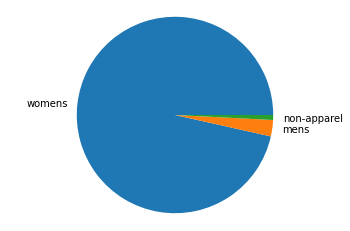

In [229]:
# create a pie chart giving perspective on gross revenue from each demographic
import matplotlib.pyplot as plt
demographics = [womens_gross_revenue, mens_gross_revenue, non_apparel_gross_revenue]
labels = ['womens', 'mens', 'non-apparel']

plt.pie(demographics, labels=labels)
plt.axis('equal')
plt.show()

In [230]:
# get the top 3 products in gross_revenue
df.loc[womens_apparel, 'gross_revenue'].nlargest(3)

214     800000.0
401     750000.0
1018    700000.0
Name: gross_revenue, dtype: float64

In [231]:
df.loc[mens_apparel, 'gross_revenue'].nlargest(3)

1215    260000.0
1418    160000.0
244      95000.0
Name: gross_revenue, dtype: float64

In [232]:
df.loc[non_apparel, 'gross_revenue'].nlargest(3)

1020    380000.0
404      24000.0
1341     10000.0
Name: gross_revenue, dtype: float64

In [233]:
# top 3 women's apparel
df.iloc[[214,401,1018]]

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month,clothing_type,mens-womens,gross_revenue
214,Nouveau Aeeival Femmes Vêtements À Manches Lon...,New Aeeival Women Clothing Long Sleeve Autumn ...,8.0,7,EUR,100000,1,3.76,11062,4663.0,...,1,https://s3-us-west-1.amazonaws.com/sweeper-pro...,https://www.wish.com/c/54bdf18039b8c045f118936a,https://contestimg.wish.com/api/webimage/54bdf...,54bdf18039b8c045f118936a,summer,2020-08,vest,womens,800000.0
401,Femmes dentelle plage boho maxi robe d'été san...,Women Lace Beach Boho Maxi Sundress Sleeveless...,15.0,115,EUR,50000,1,3.94,6735,3278.0,...,0,NaN,https://www.wish.com/c/563707b0e5be09157176fe80,https://contestimg.wish.com/api/webimage/56370...,563707b0e5be09157176fe80,summer,2020-08,dress,womens,750000.0
1018,Femmes dentelle manches courtes hauts hauts ch...,Women Lace Short Sleeve Long Tops Blouse Shirt...,7.0,22,EUR,100000,1,3.82,11913,5355.0,...,1,https://s3-us-west-1.amazonaws.com/sweeper-pro...,https://www.wish.com/c/567cb0925ff12c4829f07dfb,https://contestimg.wish.com/api/webimage/567cb...,567cb0925ff12c4829f07dfb,summer,2020-08,top,womens,700000.0


In [234]:
# top 3 men's apparel
df.iloc[[1215,1418,244]]

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month,clothing_type,mens-womens,gross_revenue
1215,Aowofs Salopette d'été en coton pour homme Cam...,Aowofs Men's Summer Cotton Overalls Summer Cam...,13.0,252,EUR,20000,0,3.91,12041,5723.0,...,1,https://s3-us-west-1.amazonaws.com/sweeper-pro...,https://www.wish.com/c/576ba1eb7f3351084cd0b578,https://contestimg.wish.com/api/webimage/576ba...,576ba1eb7f3351084cd0b578,summer,2020-08,bottom,mens,260000.0
1418,ZANZEA - Damen Sommer Mode Lose Rundhals Baumw...,ZANZEA Damen Sommer Mode Lose Rundhals Baumwol...,16.0,108,EUR,10000,1,4.25,1524,905.0,...,1,https://s3-us-west-1.amazonaws.com/sweeper-pro...,https://www.wish.com/c/5b2a113209dce569672cc9f2,https://contestimg.wish.com/api/webimage/5b2a1...,5b2a113209dce569672cc9f2,summer,2020-08,top,mens,160000.0
244,Bonne Qualité 2014 Été Vente Chaude Zipper Sho...,Good Quality 2014 Summer Hot Sale Zipper Short...,19.0,21,EUR,5000,0,4.09,1561,897.0,...,1,https://s3-us-west-1.amazonaws.com/sweeper-pro...,https://www.wish.com/c/535530635aefb0555ba4351f,https://contestimg.wish.com/api/webimage/53553...,535530635aefb0555ba4351f,summer,2020-08,bottom,mens,95000.0


In [235]:
# top 3 non-apparel
df.iloc[[1020,404,1341]]

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month,clothing_type,mens-womens,gross_revenue
1020,Été volant pare-soleil anneau de bain voiture ...,Summer Steering Wheel Sunshade Swim Ring Car I...,19.0,105,EUR,20000,1,4.40,3787,2541.0,...,0,NaN,https://www.wish.com/c/54ab85ff509baf3e966f7f2a,https://contestimg.wish.com/api/webimage/54ab8...,54ab85ff509baf3e966f7f2a,summer,2020-08,Not Apparel,Not Apparel,380000.0
404,Jouets d'eau flotteur de rangée,Water toys row float,24.0,59,EUR,1000,1,4.21,762,461.0,...,0,NaN,https://www.wish.com/c/5ac1d7201a8c21778e2a2482,https://contestimg.wish.com/api/webimage/5ac1d...,5ac1d7201a8c21778e2a2482,summer,2020-08,Not Apparel,Not Apparel,24000.0
1341,10/20/30 ml amincissant raffermissant crème de...,10/20/30ml Slimming Firming Anti-Cellulite Mas...,2.0,7,EUR,5000,0,3.91,239,118.0,...,0,NaN,https://www.wish.com/c/5ebe5359c88200382515760f,https://contestimg.wish.com/api/webimage/5ebe5...,5ebe5359c88200382515760f,summer,2020-08,Not Apparel,Not Apparel,10000.0


In [275]:
# sum the gross revenue by clothing type and mens-womens apparel

# filter womens and mens
w_filt = df['mens-womens'] == 'womens'
m_filt = df['mens-womens'] == 'mens'

# store filtered results in variable
w_apparel = df.loc[w_filt]
m_apparel = df.loc[m_filt]

# create data frames for womens and mens apparel
w_df = pd.DataFrame(w_apparel)
m_df = pd.DataFrame(m_apparel)

# calculate the total gross revenue for each clothing type
w_clothing_sum = w_df.groupby('clothing_type').sum()
m_clothing_sum = m_df.groupby('clothing_type').sum()

w_clothing_df = pd.DataFrame(w_clothing_sum)
m_clothing_df = pd.DataFrame(m_clothing_sum)

w_clothing_df_sorted = w_clothing_df['gross_revenue'].sort_values()
m_clothing_df_sorted = m_clothing_df['gross_revenue'].sort_values()

<AxesSubplot:xlabel='clothing_type'>

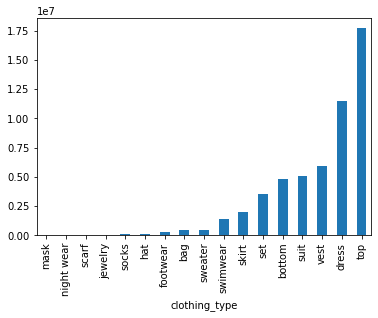

In [273]:
# create a bar chart showing the sum gross revenue for each clothing type
w_clothing_df_sorted.plot.bar(y='gross_revenue')

<AxesSubplot:xlabel='clothing_type'>

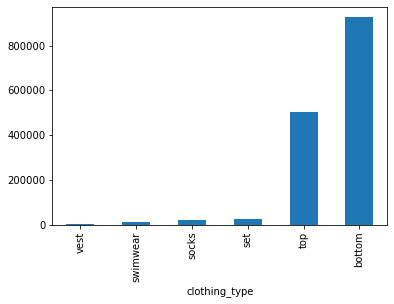

In [276]:
# create a bar chart showing the sum gross revenue for each clothing type
m_clothing_df_sorted.plot.bar(y='gross_revenue')